# Tellende prosjekt i ISTx1003 - høst 2022<a name="top"></a>

I prosjektdelen av ISTx1003 Statistikk, Statistisk læring og data science, har vi fokus på tre hovedtemaer: 
*regresjon, klassifikasjon og klyngeanalyse*.

* Dette er oppgaveteksten til den tellende prosjektoppgaven, der besvarelsen teller 30% av karakteren i emnet.
* Det skal være 4-6 studenter på hver gruppe, og alle studenter må være oppmeldt i den samme emnekoden (det vil si: én av ISTA1003, ISTG1003, ISTT1003).  **Det er opprettet gruppesett under "Prosjektgrupper: påmelding" på Blackboard**, der dere melder dere på innen **31. oktober 2022**. 
* Informasjon om prosjektmodulen finnes i Blackboard, sammen med alt kursmateriellet.
* Oppgaven skal utføres i Python, ved hjelp av Jupyter-notatbok-versjonen av denne filen som du nå leser. Notatboken er lastet opp på Jupyterhuben, men kan også finnes på Blackboard under fanen for 'ISTx1003'.
* Det er meningen at dere skal kjøre notatboken på Jupyterhuben vår https://s.ntnu.no/isthub, eller på deres egen installasjon.
* De ulike oppgavene (1, 2, 3) er vektet ulikt (50%, 30% og 20%). Antall spørsmål i hver oppgave og deloppgave varierer, men hvert spørsmål innad i hver oppgave (1, 2 og 3) teller like mye. Karakteren settes med prosentvurderingsmetoden hvor poeng blir konvertert i en prosentandel (ikke-heltall prosent blir avrundet): https://innsida.ntnu.no/wiki/-/wiki/Norsk/Prosentvurderingsmetoden
* Prosjektet leveres i Inspera.

Dere skal skrive svar på spørsmålene i dette Word-dokumentet: https://www.math.ntnu.no/emner/IST100x/ISTx1003/h2022/svarark.docx. Når dere skal levere, gjør dere filen om til en pdf (Save as/Lagre som, og så velg pdf). Dere skal også levere Jupyter notatboka dere har brukt og redigert for å få svart på oppgavene, i pdf-format. Den kan lastes ned og lagres som pdf under "File" -> "Save and Export Notebook As..." og så velger dere pdf, eventuelt HTML og så lagrer HTML-siden som en.
(Det er to grunner til å bruke denne malen: Det letter samskriving og det letter karaktersetting.)

**Dere skal altså laste opp *to* filer:**
* én pdf-fil med svar, og
* én pdf-fil som er en Jupyter notatbok til Inspera.

**Frist for innlevering av prosjektet til Inspera er mandag 21. november 2020, klokka 12:00.**

Kontakt eksamenskontoret ved problemer. Det kan ikke gis utsettelse på innleveringsfristen.

## Innholdsfortegnelse
* [Oppgave 1: Regresjon](#oppgave1)
* [Oppgave 2: Klassifikasjon](#oppgave2)
* [Oppgave 3: Klyngeanalyse](#oppgave3)


# Oppgave 1 - Lineær regresjon (50%)<a name="oppgave1"></a>

*Oppgave 1 inneholder 3 deler med oppgaver, og alle 29 spørsmål (Q1a.1), Q1a.2) etc.) teller likt. Oppgave 1 teller totalt 50 % av prosjektet.*

**Oppgaven inneholder følgende elementer:**

* Laste inn og utforske et datasett
* Tilpasse en enkel lineær regresjonsmodell og diskutere denne
* Tilpasse en multippel lineær regresjonsmodell og diskutere denne

## Innholdsfortegnelse
* [Introduksjon](#intro)
* [Rådata](#radata)
* [Oppgave 1a) Dataoppsett og klargjøring av data](#oppgave1a)
* [Oppgave 1b) Enkel regresjon](#oppgave1b)
* [Oppgave 1c) Multippel lineær regresjon](#oppgave1c)

In [2]:
# importere pakker og funksjoner vi trenger i oppgave 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

# for å fjerne unødvendige feilmeldinger om at noen pakker i fremtiden vil se annerledes ut
import warnings
warnings.filterwarnings("ignore")

### Introduksjon<a name="intro"></a>

Statens Vegvesen (SVV) har en ambisjon om smartere vedlikehold av veinettet og bygging av trygge veier, med færre enn 350 døde eller hardt skadde i trafikkulykker i året innen 2030. Dette følger av Nullvisjonen - SVVs langtidsmål om ingen dødsfall og hardt skadde. For å oppnå dette har SVV investert over en milliard kroner i forskning og teknologi for å forstå forfall av veinettet.

For øyeblikket bruker SSV en reaktiv strategi når det kommer til risikovurdering for veinettet. Altså finner vedlikhold sted etter at veien allerede har forfalt. Stengte veier kan ha store miljømessige og økonomiske konsekvenser, blant annet, og dermed er reaktive vedlikeholdsstrategier ineffektive. Slike strategier passer bedre til situasjoner der forfall ikke har store konsekvenser. På grunn av nullvisjonen går SVV derfor over mot preventive (vedlikehold utføres periodisk enten det er nødvendig eller ikke) og prediktive (man måler tilstanden til veien for å beregne når vedlikehold blir nødvendig) vedlikeholdsstrategier.

Forståelse av hvordan veier forfaller vil kunne være hjelpsomt når det kommer til å planlegge optimalt vedlikeholdsarbeid og hvor ofte vedlikehold skal utføres for å minimere stenging av veier. Altså er målet å trekke slutninger om kvaliteten på et stykke vei basert på kjente (eller ukjente) påvirkningsfaktorer, og identifisere veistrekninger som forfaller raskere. 

I denne oppgaven skal vi utføre deskriptive analyser og tilpasse statistiske modeller innenfor rammeverket lineære regresjon, for å indentifisere veiområdene med størst behov for vedlikehold. Modellene skal tilpasses data fra en elleveårs periode (2010-2020), innsamlet fra den omtrent $66.7$ kilometers lange veistrekningen på E14 som går fra Stjørdal til svenskegrensa. Området er markert i figuren under.

<figure>
  <img src="https://www.math.ntnu.no/emner/IST100x/ISTx1003/h2022/map_of_norway.png" width="300">
  <figcaption>E14 ligger i det røde området.</figcaption>
</figure>
<figure>
  <img src="https://www.math.ntnu.no/emner/IST100x/ISTx1003/h2022/e14.png" width="600">
  <figcaption>Skjermdump av E14 fra Google maps.</figcaption>
</figure>

### Rådata<a name="radata"></a>

Datainnsamlingen ble utført på E14 fra Stjørdal til svenskegrensa, en strekning som er ca. 
$67.8$ kilometer lang. Vi har elleve år med årlige veioverflatemålinger på veistykker som er ca. $20$ meter lange. Vi har $3355$ slike $20$-meters veistykker. Datasettet er omfattende og har informasjon om nye veilegginger (f. eks. asfalttype), spordybde, tverrfall, ruhet, geometri og diverse strukturelle målinger som beskriver tilstanden til veien. Målingene ble gjort med ViaPPs - et målesystem utviklet av ViaTech i samarbeid med SVV. ViaPPS-systemet festes til et kjøretøy, og måler veioverflaten og omgivelsene med bruk av LiDAR. Målingene, som f.eks. spordybde, er indikatorer på veikvalitet. Desto dypere sporing, desto mindre trafikksikker er veien, siden kjørekvaliteten og stabiliteten senkes. Dermed bruker vi her spordybde som et mål på veiytelse og veiens forventede levetid.

I tillegg til veioverflatemålinger, har vi også data om gjennomsnittlig daglig trafikkdata per $1000$ meter (dvs. trafikkintensitet, her forkortet med AADT, som står for average annual daily traffic), veidekketype (dvs. asfalttype), veibredde, grøftedybde. Vi regner AADT som høy dersom den er over $5000$, og som lav dersom den er under $5000$. SVV antar at nylagte veistykker har forventet levetid på 20-30 år, og anbefaler at vedlikeholdsarbeid utføres dersom spordybden er over $25$ mm i områder med lav AADT eller over $20$ mm i områder med høy AADT.

Det er flere faktorer som påvirker årlig spordybde, f. eks. trafikktrykket (antall og størrelse på kjøretøy), miljøfaktorer (som vær og temperatur) og veiens iboende egenskaper (som materiale og byggekvalitet). Når en ny vei legges akselereres sporing på grunn av komprimering fra trafikk. Deretter stabiliseres sporingen en stund, før den igjen øker raskt, og da blir sporingen synlig med det blotte øye. *I denne oppgaven definerer vi sporing som den årlige endringen i en spordybdemåling.*

<figure>
  <img src="https://www.math.ntnu.no/emner/IST100x/ISTx1003/h2022/sporing.jpg" width="300">
  <figcaption>Disse "gropene" i veien er sporing.</figcaption>
</figure>

Mesteparten av dataene vi bruker i oppgaven kommer fra SVVs offentlig tilgjengelige Nasjonal vegdatabank (NVDB), se https://vegkart.atlas.vegvesen.no/. Selve sporingsdybden er hentet fra Rosita-databasen (disse dataene ligger ikke åpent for alle, men vi får bruke dem i dette prosjektet).

### Oppgave 1a) Dataoppsett og klargjøring av data<a name="oppgave1a"></a>

*Oppgave 1a) inneholder 6 spørsmål som du skal svare på.*

Før vi begynner selve analysen skal vi bli kjent med datasettet. Denne deloppgaven krever ingen koding.

Når vi får dataene, kommer de som en stor fil med masse informasjon. Vi har allerede fikset datasettet så det er klart for regresjonsanalysene dere skal gjøre i denne oppgaven, og forklart hvordan i denne filen: https://www.math.ntnu.no/emner/IST100x/ISTx1003/h2022/fikse_data.html (merk: dere skal ikke kjøre kode selv her). Svar på noen spørsmålene i deloppgave 1a) finner dere ved å lese gjennom filen, resten av svarene finner dere i denne notatboka.

Herfra antar vi at dere har lest filen som viser hvordan dataene er hentet ut fra det store, originale datasettet.

Responsvariablen er sporing (årlig endring i spordybde, målt i millimeter) per ti tusen biler. Vi ser på endring i spordybde fordi det sier noe om forfallsprosessen fra et datadrevet perspektiv, og per ti tusen biler fordi vi vil kunne bruke kunnskapen om E14 til å forutsi hvordan veiene burde vedlikeholdes steder med mer/mindre trafikk også. I tillegg forventer vi ingen økning i spordybden på veier der ingen biler kjører.
Hvis endringen i spordybde er svært negativ (altså at spordybden plutselig har blitt mye mindre enn året før) kan vi gå ut i fra at det er fordi en ny vei har blitt lagt.

Forklaringsvariablene er: 

1) asfalttype (svakere binding i asfalt, f.eks. grus, gir raskere sporing), 
2) veibredde målt i meter (tynnere veier gir raskere sporing), 
3) spordybde målt i millimeter fra det forrige året.

In [3]:
# laste inn dataene (vi kaller den 'df', for 'data frame')
df = pd.read_csv('https://www.math.ntnu.no/emner/IST100x/ISTx1003/h2022/sporing_data.csv', sep = ",")
# printe første og siste radene
df

,sporing_trafikk,sporing,spordybde,asfalt,veibredde,posisjon
0,2.204301,4.1,1.2,A1,6.50,0.0
1,0.752688,1.4,7.4,A1,6.50,19.7
2,0.860215,1.6,6.1,A1,6.50,39.4
3,0.483871,0.9,4.2,A1,6.50,59.2
4,0.967742,1.8,4.5,A1,6.50,79.0
...,...,...,...,...,...,...
3350,30.208333,5.8,9.8,A3,3.05,66594.3
3351,21.875000,4.2,12.6,A3,3.00,66614.0
3352,13.541667,2.6,15.5,A3,3.00,66633.8
3353,6.770833,1.3,13.9,A3,3.00,66653.8


In [4]:
# ser litt ekstra på asfalt-dataene
df['asfalt'].value_counts()

A3    1846
A2     969
A1     540
Name: asfalt, dtype: int64

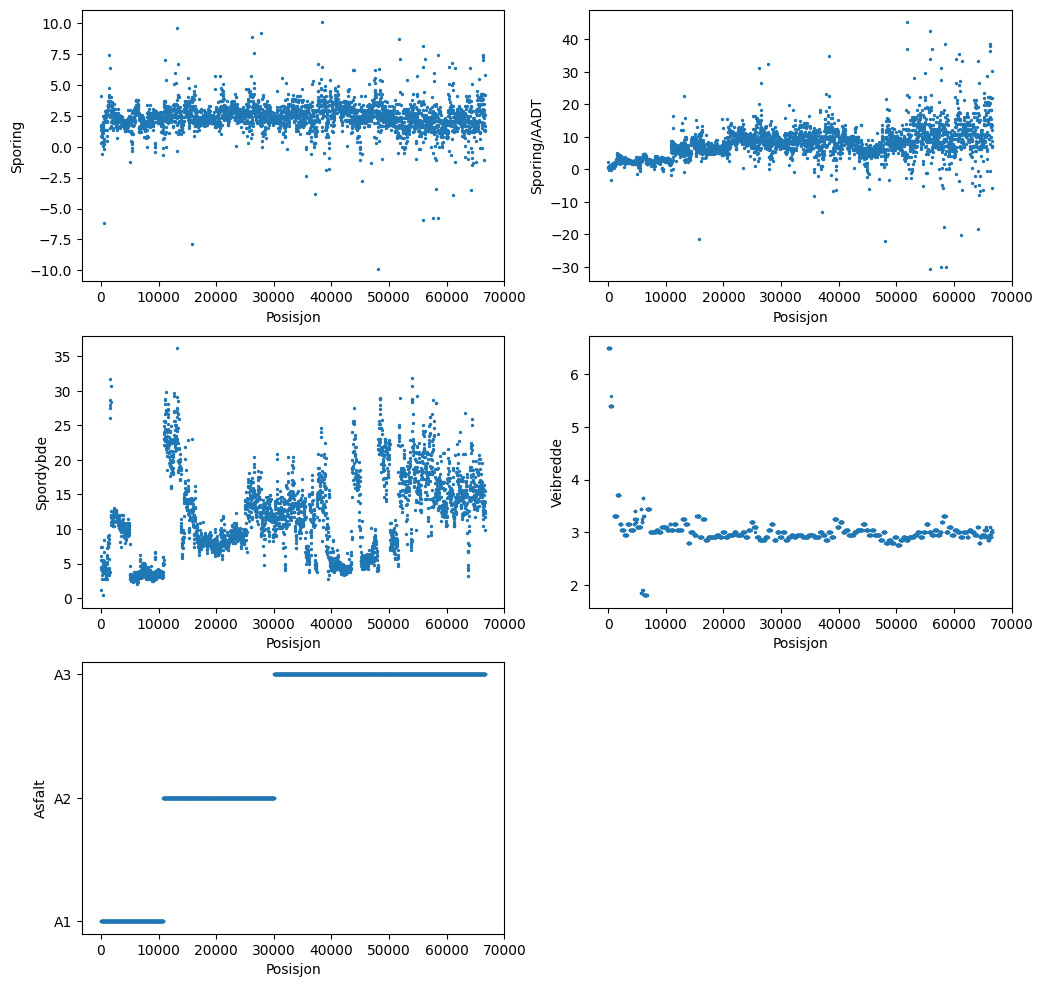

In [5]:
figure, axis = plt.subplots(3, 2, figsize = (12, 12))

axis[0, 0].scatter(df['posisjon'], df['sporing'], s = 2)
axis[0, 0].set_xlabel("Posisjon"); axis[0, 0].set_ylabel("Sporing")

axis[0, 1].scatter(df['posisjon'], df['sporing_trafikk'], s = 2)
axis[0, 1].set_xlabel("Posisjon"); axis[0, 1].set_ylabel("Sporing/AADT")

axis[1, 0].scatter(df['posisjon'], df['spordybde'], s = 2)
axis[1, 0].set_xlabel("Posisjon"); axis[1, 0].set_ylabel("Spordybde")
  
axis[1, 1].scatter(df['posisjon'], df['veibredde'], s = 2)
axis[1, 1].set_xlabel("Posisjon"); axis[1, 1].set_ylabel("Veibredde")

axis[2, 0].scatter(df['posisjon'], df['asfalt'], s = 2)
axis[2, 0].set_xlabel("Posisjon"); axis[2, 0].set_ylabel("Asfalt")

axis[-1, -1].axis('off')

plt.show()

Vi ser at det er mange steder spordybden overstiger grensa på Vegvesenet har satt for når de må fikse veien. 
Grensa er $25$ mm for vei med lav trafikkintensitet og $20$ mm for vei med høy trafikkintensitet.
Før vi går i gang med oppgavene vil vi se om de stedene som hadde spordybde på mer enn $25$ mm har negativ sporing året etter. Vi har ikke lagret trafikkintensiteten i dataene, så vi velger å se på områdene med mer enn $25$ mm, da det er en vei som må fikses uansett trafikkintensitet.

Vi plotter et frekvensplott med sporingen per ti tusen biler til de veistrekningene som i 2019 hadde mer enn $25$ mm sporing.

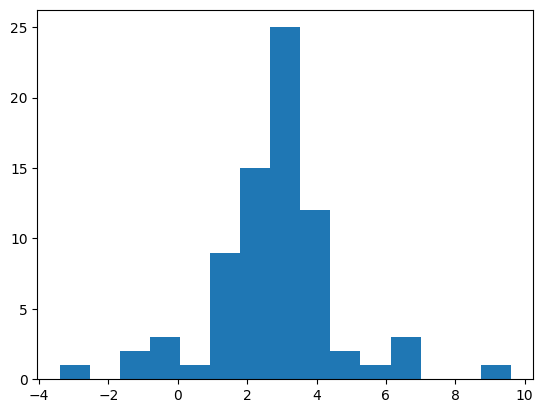

In [6]:
plt.hist(df[df['spordybde'] > 25]['sporing'], bins = 15);

Noen av de 20 meter lange veistrekningene har fått en negativ sporing, men de fleste har en positiv verdi for sporing, og veien har ikke blitt fikset siden 2019 selv om spordybden da overskred SVVs grense.

**Q1a.1)** Hvor mange observasjoner har vi i datasettet? Matcher det med lengden på hver del av veien og den totale veilengden?
<p>Det er gjort 3355 observasjoner i dette datasettet. 3355 observasjoner på 20 meter tilsvarer ikke den totale veilengden, det er ca. 700m uten måling. </p>

**Q1a.2)** Hva tror du en negativ verdi av `sporing` betyr i praksis? Hvordan tolker vi betydningen av `sporing_trafikk`?

**Q1a.3)** Vi manglet originalt 17 av 3355 målinger av veibredden. Hvordan løste vi det?

**Q1a.4)** Hva er det fulle navnet på asfalttypen vi har mest av? (skjelettasfalt, asfaltbetong eller asfaltgrusbetong)

**Q1a.5)** Hvorfor tror du veibredden er mye større for lave verdier av avstand?

**Q1a.6)** SVV vil at nye veier skal holde i 20-30 år. Basert på dataene fra 2020, er det realistisk? Hvorfor/hvorfor ikke? Veien skal repareres når spordybden blir for stor. Blir veien reparert ofte nok? Gi en kort begrunnelse.

### Oppgave 1b) Enkel lineær regresjon<a name="oppgave1b"></a>

*Oppgave 1b) inneholder 12 spørsmål som du skal svare på.*

Nå skal vi se på endring i sporingsdybde, og undersøke om spordybden fra året før er en god forklaringsvariabel for dette. Under ser vi et kryssplott av `spordybde` mot `sporing_trafikk`.


In [ ]:
plt.scatter(df['spordybde'], df['sporing_trafikk'], s = 2)
plt.ylabel("Sporing/AADT")
plt.xlabel("Spordybde")
plt.show()

Vi skal tilpasse en enkel lineær modell med `sporing_trafikk` som respons og `spordybde` som (eneste) forklaringsvariabel. Som vi har snakket om i undervisningen, består det å utføre en lineær regresjonsanalyse (både enkel og multippel) av følgende steg:

1) Bli kjent med dataene ved å se på oppsummeringsmål og ulike typer plott
2) Spesifisere en matematisk modell (modellformel)
3) Initialisere og tilpasse modellen
4) Presentere resultater fra den tilpassede modellen
5) Evaluere om modellen passer til dataene

Steg 1 har vi nå gjort (i oppgave 1a)). Koden under gjør steg 2, 3 og 4. Studér og kjør den.

In [ ]:
# Steg 2: spesifiser matematisk modell
formel = 'sporing_trafikk ~ spordybde'

# Steg 3: Initaliser og tilpass en enkel lineær regresjonsmodell
# først initialisere
modell = smf.ols(formel, data = df)
# deretter tilpasse
resultat = modell.fit()

# Steg 4: Presenter resultater fra den tilpassede regresjonsmodellen
resultat.summary()

**Q1b.1)** Skriv ned ligningen for den estimerte regresjonsmodellen og forklar de ulike elementene.

**Q1b.2)** Hva er den estimerte verdien til skjæringspunktet (intercept) $\hat{\beta}_0$, og hvordan vil du tolke den?

**Q1b.3)** Vi ser at for `spordybde` er `coef` lik 0.2665. Hva er formelen som er brukt for å regne ut denne verdien? Hvordan vil du forklare dette tallet til noen som ikke har hørt om lineær regresjon?

**Q1b.4)** For `spordybde` har vi også tallene 0.239 og 0.294 i kolonnene `[0.025 0.975]`. Hva er disse to tallene og hvordan tolker du dem?

**Q1b.5)** Videre står det for `spordybde` at `P>|t|` er 0.000. Hvilken hypotese er testet her? Hva er konklusjonen fra hypotesetesten hvis vi bruker signifikansnivå $0.05$? Hvordan henger dette sammen med tallene 0.239 og 0.294 fra forrige punkt?

Steg 5 gjenstår, og der skal vi evaluere om vi har en god modell, noe vi allerede delvis har gjort. Nå skal vi sjekke modellantagelsene i en enkel lineær regresjon, og det kan vi gjøre ved å lage residual-plott. Men først:


**Q1b.6)** Hvilke modellantagelser gjør vi i en enkel lineær regresjon?

**Q1b.7)** Hva er en predikert verdi og hva er et residual? Skriv også ned relevante formler.

**Q1b.8)** Hvordan kan vi bruke predikert verdi og residual til å sjekke modellantagelsene?

**Q1b.9)** Vi får oppgitt tallet `R-Squared` til å være 0.098 (skrives ofte som 9.8%). $R^2$ har i enkel lineær regresjon en sammenheng med korrelasjonskoeffisienten, men det er også en annen definisjon som er relatert til sum av kvadrerte residualer. Hvilken formel er det? Forklar alle symboler. Hvordan vil du forklare $R^2$ til noen som ikke har hørt om enkel lineær regresjon?

Vi har i undervisningen snakket om at det er to typer plott vi skal lage med utgangspunkt i residualene, og disse er kodet under.

In [ ]:
# Steg 5: Evaluere om modellen passer til dataene
# Plotte predikert verdi mot residual
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(resultat.fittedvalues, resultat.resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

# Lage kvantil-kvantil-plott for residualene
sm.qqplot(resultat.resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

**Q1b.10)** Studer plottet av predikert verdi mot residual. Hvordan skal et slikt plott se ut hvis modellantagelsene er oppfylt? Hvordan vil du evaluere plottet?

**Q1b.11)** Studer QQ-plottet av residualene. Hvordan vil du evaluere plottet?

**Q1b.12)** Vil du konkludere med at modellen passer godt?

### Oppgave 1c) Multippel lineær regresjon<a name="oppgave1c"></a>

*Oppgave 1c) inneholder 11 spørsmål som du skal svare på.*

I praksis har vi ofte flere prediktorer for sporing (f.eks. veibredde, asfalttype, værforhold, grøftedybde, etc.) og ikke bare spordybden året før. Vi skal se på om det er lurt å ta med mer enn bare spordybde i modellen vår.

En rekke plott vises under. Vi ser kryssplott, tetthetsplott (en glattet versjon av histogram), og boksplott. For tetthetsplottene og boksplottene ser vi også at vi deler data inn i `asfalttype` for å se om `asfalttype` påvirker effekten som `spordybde` og `veibredde` har på `sporing_trafikk`.

(Husk fra 1a): A1 = skjelettasfalt, A2 = asfaltbetong, A3 = asfaltgrusbetong)

In [ ]:
# Kryssplott av spordybde mot sporing_trafikk, veibredde mot sporing_trafikk, og spordybde mot veibredde.
# På diagonalen er glattede histogrammer (tetthetsplott) av sporing_trafikk, spordybde og veibredde
sns.pairplot(df, vars = ['sporing_trafikk', 'spordybde', 'veibredde'],
             diag_kind = 'kde',
             plot_kws = dict(alpha = 0.4))
plt.show()

# Boksplott av sporing_trafikk mot asfalt
ax = sns.boxplot(x = "asfalt", y = "sporing_trafikk", data = df)
plt.show()

# Kryssplott av spordybde mot sporing_trafikk, nå med farger for asfalttype
sns.pairplot(df, vars = ['sporing_trafikk', 'spordybde', 'veibredde'],
             hue = 'asfalt', 
             diag_kind = 'kde',
             plot_kws = dict(alpha = 0.4))
plt.show()


**Q1c.1)** Oppsummer kort hva du ser i plottene. Fokus skal være om du tror at det er noen sammenheng mellom `sporing_trafikk` (som respons) og de tre forklaringsvariablene (`spordybde`, `veibredde` og `asfalt`). Hvilken asflattype har høyest verdi for sporing_trafikk?

Vi skal nå tilpasse en multippel lineær regresjon med `sporing_trafikk` som respons, og `spordybde`, `veibredde` og `asfalt` som forklaringsvariabler. Den nye modellformelen blir da:

In [ ]:
formel = 'sporing_trafikk ~ spordybde + veibredde + asfalt'

In [ ]:
# her kan du lime inn koden for å tilpasse den nye modellen

**Q1c.2)** Tilpass modellen ved å bruke koden for steg 3 og 4 over, med den nye formelen. Skriv ned ligningen for den estimerte regresjonsmodellen.

**Q1c.3)** Hvor mange regresjonsparametere er estimert? Hva er betydningen av de ulike regresjonsparameterene?

**Q1c.4)** Sammenlign den estimerte regresjonskoeffisienten for `spordybde` i denne modellen med samme koeffisient i den enkle lineære regresjonsmodellen. Har disse to samme tolkning?

**Q1c.5)** Hva er predikert sporing per ti tusen biler for en veistrekning med asfaltbetong, 10 mm spordybde og 4 meter veibredde? (Regn ut for hånd ved å bruke relevante tall fra `resultat.summary()`.)

**Q1c.6)** Forklaringsvariabelen `asfalt` er kategorisk og vi har brukt en såkalt dummy-variabelkoding, der `A1` (skjelettasfalt) er referansekategorien. Er effekten av de andre asfalttypene på sporing per ti tusen biler signifikant forskjellig fra effekten for asfaltbetong på nivå $0.05$? Hvis vi sammenligner tre deler av veien med lik spordybde og veibredde, men ulik asfalttype, hva er gjennomsnittlig forskjell i sporing per ti tusen biler? Hvilken type asfalt ser ut til å gi den mest solide veien?

**Q1c.7)** Hva er andel forklart variasjon? Ville du forventet at andelen forklart variasjon gikk opp da vi la til flere forklaringsvariabler enn bare `spordybde`? Hvis vi nå la til en forklaringsvariabel som beskriver fargen på bilene som kjører på veien, ville da $R^2$ økt?

**Q1c.8)** Basert på utskrifter og plott, vil du konkludere med at modelltilpasningen er god?

Helt til slutt lurer vi på om vi kan kutte ut asfalttype i modellen. 

In [ ]:
# her kan du lime inn koden for å tilpasse den nye modellen

**Q1c.9)** Utfør en ny multippel lineær regresjon (steg 2-5) med `sporing_trafikk` som respons og `veibredde` og `spordybde` som forklaringsvariabler. Du må nå modifisere modellformelen ved å ta bort `asfalt`, og så kopiere inn kode for steg 2-5. Hvor mange regresjonsparametere er nå estimert? Hva er de signifikante forklaringsvariablene?

**Q1c.10)** Er modelltilpasningen god?

**Q1c.11)** Sammenlign `Adj. R-squared` (også kalt justert $R^2$) for modellen med og uten `asfalt`. Hvis vi skal avgjøre om `asfalt` skal være med som forklaringsvariabel ved å bruke justert $R^2$, hva blir konklusjonen? Begrunn svaret ditt.


[Til toppen.](#top)

# Oppgave 2 - Klassifikasjon (30%)<a name="oppgave2"></a>

*Oppgave 2 inneholder 4 deler med oppgaver, og alle 13 spørsmål (Q2a.1), Q2a.2) etc.) teller likt. Oppgave 2 teller totalt 30 % av prosjektet.*

**Oppgaven inneholder følgende elementer:**

* Laste inn og utforske et datasett for klassifikasjon
* Dele datasettet inn i treningssett, valideringssett og testsett
* Tilpasse en logistisk regresjon og diskutere denne
* Utføre $k$-nærmeste nabo-klassifikasjon, og evaluere godhet av klassifikasjonsresultatene

## Innholdsfortegnelse
* [Ble det hjemmeseier?](#intro)
* [Oppgave 2a) Lese inn og preprosessere data](#oppgave2a)
* [Oppgave 2b) Logistisk regresjon](#oppgave2b)
* [Oppgave 2c) $k$-nærmeste-nabo-klassifikasjon](#oppgave2c)
* [Oppgave 2d) Evaluere beste modeller](#oppgave2d)


### Ble det hjemmeseier?<a name="intro"></a>

Datasettet vi skal se på er fra de fire øverste divisjonene i engelsk fotball, i sesongen  2021-2022 og oppgaven går ut på å tilpasse ulike metoder for å predikere om hjemmelaget vinner en gitt kamp utifra data på antall skudd på mål, cornere og forseelser (regelbrudd som fører til frispark eller straffespark).

Mer informasjon om dataene: https://www.football-data.co.uk/englandm.php.

In [ ]:
# importere pakker og funksjoner vi trenger i oppgave 2
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# fordelinger, modeller for regresjon, qq-plott 
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

# trening og testsett, evaluering av klassifikasjonsmetoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

### Oppgave 2a) Lese inn og preprosessere data<a name="oppgave2a"></a>

*Oppgave 2a) inneholder 5 spørsmål du skal svare på.*

I datasettet vi skal jobbe med inneholder hver rad i datasettet informasjon om en kamp, der to lag møtte hverandre. Dataene finnes i fire forskjellige filer, og hver fil inneholder informasjon om kampene i en gitt divisjon. Vi laster inn dataene fra hver fil og kombinerer dem. Etter vi har gjort dette har datasettet $2026$ rader og $106$ kolonner. En gitt rad tilsvarer en gitt kamp og en gitt kolonne tilsvarer en type informasjon (f.eks. antall cornere hjemmelaget hadde). Kolonner som begynner på `H` angår hjemmelaget og `A` angår bortelaget.

I en gitt kamp vinner enten hjemmelaget, eller så vinner ikke hjemmelaget (uavgjort eller borteseier). Resultatet av en kamp er dermed at:
* hjemmelaget vinner - kodet som $1$
* hjemmelaget vinner ikke - kodet som $0$.

Kampresultatet ($0$ eller $1$) legger vi i kolonnen `y`, som skal være hva vi vil predikere.

Vi skal ikke se på alle variablene i datasettet, og skal i tillegg til `y` konsentrere oss om

* `HST`, `AST`: antall skudd på mål for henholdsvis hjemmelaget og bortelaget
* `HC`, `AC`: antall cornere for henholdsvis hjemmelaget og bortelaget
* `HF`, `AF`: antall forseelser for henholdsvis hjemmelaget og bortelaget

Istedenfor å se direkte på disse tre antallene for de to lagene, skal vi for hver kamp lage

* `skudd_paa_maal_diff`=`HST`-`AST`
* `corner_diff`=`HC`-`AC`
* `forseelse_diff`=`HF`-`AF`

og dette skal være våre eneste forklaringsvariabler for hver kamp.

_Oppsummert_: Observasjonsenheten i dataene er en fotballkamp, vi har tre forklaringsvariabler `skudd_paa_maal_diff`, `corner_diff` og `forseelse_diff`, og `y` (0 eller 1) er responsen vi ønsker å predikere.


Koden under leser inn dataene, lager de nye variablene og putter alt inn i en ny data frame. Etter det er gjort har vi en datasett med $2026$ rader (kamper) og $4$ kolonner.

In [ ]:
# Lese inn datasettene ved funksjon fra pandas (df=data frame - vanlig navn å gi et datasett)
df0 = pd.read_csv("https://www.math.ntnu.no/emner/IST100x/ISTx1003/h2022/E0.csv", sep = ',') # Premier League
df1 = pd.read_csv("https://www.math.ntnu.no/emner/IST100x/ISTx1003/h2022/E1.csv", sep = ',') # Championship
df2 = pd.read_csv("https://www.math.ntnu.no/emner/IST100x/ISTx1003/h2022/E2.csv", sep = ',') # League 1
df3 = pd.read_csv("https://www.math.ntnu.no/emner/IST100x/ISTx1003/h2022/E3.csv", sep = ',') # League 2

# Sett sammen datasettene til 1 data-frame
df_in=pd.concat([df0,
                 df1,
                 df2,
                 df3], ignore_index = True)
df=pd.concat([pd.Series(np.where(df_in['FTR'] == 'H', 1, 0)),
              df_in['HST']-df_in['AST'], 
              df_in['HC']-df_in['AC'],
              df_in['HF']-df_in['AF']], axis = 1)

# Henter ut de dataene vi er interessert i
df.columns=['y', 'skudd_paa_maal_diff', 'corner_diff', 'forseelse_diff']
print(df.describe())


Videre vil vi dele datasettet vårt inn i tre datasett: et treningssett, et valideringssett og et testsett. Først deler vi data inn i 80\% trening/validering og 20\% test, og deretter deler vi trening/valideringssettet inn i 75\% trening og 25\% validering.


In [ ]:
df_trenval, df_test = train_test_split(df, test_size = 0.2, random_state = 1000, stratify = df['y'])
df_tren, df_val = train_test_split(df_trenval, test_size = 0.25, random_state = 1, stratify = df_trenval['y'])
print("tren: ", df_tren.shape)
print(df_tren.describe())
print("val: ", df_val.shape)
print(df_val.describe())
print("test: ", df_test.shape)
print(df_test.describe())
print(df_tren["y"].value_counts())
print(df_val["y"].value_counts())
print(df_test["y"].value_counts())

I denne oppgaven skal vi etterhvert tilpasse logistisk regresjon og $k$-nærmeste nabo-klassifikasjon.

**Q2a.1)** Hvorfor ønsker vi å dele dataene inn i trening-, validering- og test-sett?

**Q2a.2)** Hva brukes hver av disse delene til i våre analyser?

**Q2a.3)** Hvor stor andel av dataene er nå i hver av de tre settene? Ser de tre datasettene ut til å ha lik fordeling for de tre forklaringsvariablene og responsen?

For å utforske dataene lager vi kryssplott av de tre forklaringsvariablene for treningsdataene og fargelegger punktene fra kampene etter hvorvidt det var hjemmeseier eller ikke. På diagonalen ser vi empiriske tetthetsplott (glattet variant av et histogram). Vi har også regnet ut empirisk korrelasjonskoeffisient for alle par av variabler.

In [ ]:
sns.pairplot(df_tren, vars = ['skudd_paa_maal_diff','corner_diff','forseelse_diff'],
             hue = 'y', 
             diag_kind = 'kde',
             plot_kws = dict(alpha = 0.4))
plt.show()

corr = df_tren.corr()
display(corr.style.background_gradient(cmap = 'coolwarm', axis = None, vmin = -1, vmax = 1))
plt.show()

**Q2a.4)** Kommenter hva du ser i plottene og utskriften.

**Q2a.5)** Hvilke av de tre variablene tror du vil være gode til å bruke til å predikere om det blir hjemmeseier? Begrunn svaret kort.

### Oppgave 2b) Logistisk regresjon<a name="oppgave2b"></a>

*Oppgave 2b) inneholder 5 spørsmål du skal svare på.*

Vi tilpasser en logistisk regresjon til treningssettet, og regner ut feilrate for valideringssettet gitt at vi klassifiserer som suksess (hjemmeseier) når sannsynligheten for hjemmeseier er anslått til minst 0.5.

Dette gjør vi med de samme stegene som det vi gjorde for multippel lineær regresjon:

1) Bli kjent med dataene ved å se på oppsummeringsmål og ulike typer plott
2) Spesifisere en matematisk modell (modellformel)
3) Initialisere og tilpasse modellen
4) Presentere resultater fra den tilpassede modellen
5) Evaluere om modellen passer til dataene

Vi er ferdige med Steg 1, og gjør så Steg 2-4 under.

In [ ]:
# Steg 2: Modellformel
formel = "y ~ skudd_paa_maal_diff + corner_diff + forseelse_diff"

# Steg 3: Initialiser modellen 
modell = smf.logit(formel, data = df_tren)

# Tilpass modellen
resultat = modell.fit()

# Steg 4: Presenter resultater fra den tilpassede modellen 
print(resultat.summary())

# Tolkning av estimerte regresjonsparametere er på exp-skala (odds)
print("FLERE utregninger:")
print("exp(beta): \n", np.exp(resultat.params), sep = "")

# Spesifiser verdi for cutoff
cutoff = 0.5

# Prediker verdi for valideringssettet
val_pred = resultat.predict(exog = df_val)

# Klassifiser som seier for hjemmelaget hvis sannsynligheten for at hjemmelaget vant er over 0.5
y_valpred = np.where(val_pred > cutoff, 1, 0)
y_valobs = df_val['y']

# Finn andel ukorrekte klassifikasjoner
print("Feilrate:", 1 - accuracy_score(y_true = y_valobs, y_pred = y_valpred))

**Q2b.1)** Hvilke forklaringsvariabler er signifikante i modellen på signifikansnivå $0.05$?

**Q2b.2)** Hvordan kan du tolke verdien av `exp(skudd_paa_maal_diff)`?

**Q2b.3)** Hva angir feilraten til modellen? Hvilket datasett er feilraten regnet ut fra? Er du fornøyd med verdien til feilraten?

Tilpass nå den logistiske regresjonen uten `exp(forseelse_diff)` som forklaringsvariabel - ved å kopiere koden over (men ikke den gamle formelen).

**Q2b.4)** Diskuter hva du ser.

**Q2b.5)** Som din beste modell for logistisk regresjon, vil du velge modellen med eller uten `forseelse_diff` som kovariat? Begrunn svaret.

In [ ]:
# Steg 2: Modellformel
formel2 = "y ~ skudd_paa_maal_diff + corner_diff"

In [ ]:
# her kan du lime inn Steg 3-4 fra koden over

### Oppgave 2c) $k$-nærmeste-nabo-klassifikasjon<a name="oppgave2c"></a>

*Oppgave 2c) inneholder 1 spørsmål du skal svare på.*

Vi skal nå kun se på forklaringsvariablene `skudd_paa_maal_diff` og `corner_diff`, og tilpasse $k$-nærmeste-nabo-metoden der vi bruker euklidsk avstand som avstandsmål. Vi bruker valideringssettet til å velge $k$.

Koden under tilpasser $k$-nærmeste nabo-klassifikasjon for ulike verdier for $k$, deretter regnes feilrate ut på valideringssettet og plottes.

In [ ]:
knaboer = np.arange(1, 49, step = 2)
val_feilrate = np.empty(len(knaboer))

X_tren = df_tren[['skudd_paa_maal_diff', 'corner_diff']] # bruker bare disse to forklaringsvariablene
X_val = df_val[['skudd_paa_maal_diff', 'corner_diff']] 

for i,k in enumerate(knaboer):
    
#Initialiser kNN med  k neighbors
    knn = KNeighborsClassifier(n_neighbors = k, p = 2) # p = 2 gir euklidsk avstand

# Tilpass modellen med treningssettet
    knn.fit(X_tren, df_tren['y'])
    
# Beregn feilrate på valideringssett
# score er accuracy= "andel korrekt"
    val_feilrate[i] = 1 - knn.score(X_val, df_val['y'])
    
# Lage plott
plt.title('k-NN for ulike verdier av antall naboer k')
plt.plot(knaboer, val_feilrate, label = 'Feilrate på valideringssettet')
plt.legend()
plt.xlabel('Antall naboer k')
plt.ylabel('Feilrate')
plt.show()

valres=np.vstack((knaboer, val_feilrate))
print("Valideringsfeilrate:")
print(valres.T)

mink_valfeilrate = knaboer[np.where(val_feilrate == val_feilrate.min())]
print(mink_valfeilrate[0])

**Q2c.1)** Forklar kort hva som er gjort i koden over, og hvilken verdi av $k$ du vil velge.

### Oppgave 2d) Evaluere beste modeller<a name="oppgave2d"></a>

*Oppgave 2d) inneholder 2 spørsmål du skal svare på.*

Nå tar vi frem testsettet og sammenligner den beste modellen for logistisk regresjon med den beste for $k$-nærmeste-nabo-klassifikasjon.

**Gjør nødvendige endringer i koden under.**

**Q2d.1)** Vil du foretrekke å bruke logistisk regresjon eller $k$-nærmeste-nabo-klassifikasjon på fotballkampdataene?

**Q2d.2)** Oppsummer hva du har lært at kan være en god metode for å predikere om hjemmelaget vinner en fotballkamp.

In [ ]:
# beste resultat for logistisk regresjon
bestelogist = 0 # hva er navnet på resultatobjektet fra den logistiske regresjon du valgte? var det den med eller uten forseelse_diff?
test_pred = bestelogist.predict(exog = df_test)
y_testpred = np.where(test_pred > cutoff, 1, 0)
y_testobs = df_test['y']
print("Feilrate logistisk regresjon:", 1 - accuracy_score(y_true = y_testobs, y_pred = y_testpred))

# beste resultat for kNN
bestek = 0 # hva er din beste k?
knn = KNeighborsClassifier(n_neighbors = bestek, p = 2)
knn.fit(X_tren, df_tren['y'])
X_test=df_test[['skudd_paa_maal_diff', 'corner_diff']]
print("Feilrate kNN:", 1 - knn.score(X_test, df_test['y']))

In [ ]:
# BONUS - plotting av klassegrensene for de beste modellene!

X = X_tren
n = 50  # steglengde
# lage et grid for å plotte
x_min, x_max = X['skudd_paa_maal_diff'].min() - 0.5, X['skudd_paa_maal_diff'].max() + 0.5
y_min, y_max = X['corner_diff'].min() - 0.5, X['corner_diff'].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, n),
                     np.linspace(y_min, y_max, n))
# Plotter nå klassegrensen, ved å predikere klassen til hver observasjon i griddet vi laget.
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(figsize = (10,10))
ax.contour(xx, yy, Z, cmap = plt.cm.Paired)
ax.scatter(xx, yy, c = Z, marker = ".",cmap = plt.cm.coolwarm)
ax.set_xlabel('skudd_paa_maal_diff', fontsize = 18)
ax.set_ylabel('corner_diff', fontsize = 18)
#fig.show()

# legger til klassegrensen for logistisk regresjon - dette blir bare riktig hvis du 
# har valgt modellen med skudd_paa_maal_diff og corner_diff som den beste modellen

beta0 = resultat.params[0]
beta1 = resultat.params['skudd_paa_maal_diff']
beta2 = resultat.params['corner_diff']
x = np.linspace(-1.5, 4.5, n)
y = -beta0/beta2 - x*beta1/beta2
plt.plot(x, y, '-r', label = 'logistisk klassegrense')
plt.scatter(X_tren['skudd_paa_maal_diff'], X_tren['corner_diff'], c = df_tren['y'])

[Til toppen.](#top)

# Oppgave 3: Klyngeanalyse (20%)<a name="oppgave3"></a>

*Oppgave 3 inneholder 4 deler med oppgaver, og alle 11 spørsmål (Q3a.1), Q3a.2) etc.) teller likt. Oppgave 3 teller totalt 20 % av prosjektet.*

**Oppgaven inneholder følgende elementer:**

* Laste inn og utforske et bilde, gjøre bildet om til et datasett for bruk i klyngeanalyse
* Bruk $K$-gjennomsnitt-klyngeanalyse får å finne klynger i bilder av håndskrevne tall. 
* Vise resultater fra klyngeanalysen - som bilde - og tolke resultatene
* Diskutere $K$-gjennomsnitt-klyngeanalyse vs. hierarkisk klynganalyse
* Utvide til flere klynger i $K$-gjennomsnitt-klyngeanalyse

## Innholdsfortegnelse
* [Introduksjon](#intro)
* [Oppgave 3a) Les inn datasettet og bli kjent med det](#oppgave3a)
* [Oppgave 3b) Klyngeanalyse med $K$-gjennomsnitt](#oppgave3b)
* [Oppgave 3c) Hierarkisk klyngeanalyse](#oppgave3c)
* [Oppgave 3d) Prediksjon](#oppgave3d)

### Finn klynger (struktur) i bildene av håndskrevne tall<a name="intro"></a>

Et stort felt innom maskinlæring er bildegjenkjenning (image recognition) og klassifisering. Dette betyr at vi vil laste inn et bilde til en statistisk algoritme, og får tilbake en etikett som beskriver hva bildet representerer, for eksempel en person, et tall, en sykdom, osv.

I denne oppgaven skal vi jobbe med data fra *mnist* (Modified National Institure of Standards and Technology) databasen, som for eksempel finnes her: https://www.kaggle.com/c/digit-recognizer. Datasettet inneholder digitaliserte bilder av handskrevne siffer (0-9), og dette pleier å bli brukt for å trene maskinlæringalgoritmer for klassifisering (det betyr at du vil forutsi hvilket tall et bestemt bilde inneholder, slik at datamaskinen kan lese tall, for eksempel postnummer på et brev).

Her bruker vi dette datasettet til noe annet: Vi vil undersøke om vi finner struktur i bildene ved bruk av en klyngeanalyse. Vi vil jo kanskje håpe at de samme sifrene kommer til å bli gruppert i en klynge fordi de inneholder lignende mønstre. Her skal vi se om det er sant. 

Vi har lært om to populære algoritmer som brukes til å lage klynger av objekter: 

   * $K$-gjennomsnitt ($K$-means) algoritmen: Målet med denne algoritmen er å plassere de individuelle observasjonene i $K$ grupper (kalt klynger) basert på observasjonenes avstand til grupper av andre observasjoner. Algoritmen kjøres iterativt, og stoppes når at alle observasjoner som ligner hverandre er plassert i en gruppe (klynge) sammen.
   * Hierarkisk klyngeanalyse (se nedenfor).

**Vi skal kun se på 3 ulike siffer mellom 0 og 9.**

In [ ]:
# importere pakker og funksjoner vi trenger i oppgave 3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans  # k-gjennomsnitt klyngeanalyse
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

### Oppgave 3a) Les inn datasettet og bli kjent med det<a name="oppgave3a"></a>

*Oppgave 3a) inneholder 3 spørsmål du skal svare på.*

Vi begynner med å lese inn datasettet som inneholder informasjon om digitaliserte handskrevne siffer. Hvert siffer finnes i en firkant med $28\cdot 28$ = 784 pixler, og dermed er hvert bilde representert som en vektor med lengde 784.


In [ ]:
# Leser inn datasettet og ser på de første 5 radene (tallene)

images = pd.read_csv('https://www.math.ntnu.no/emner/IST100x/ISTx1003/h2022/mnist2022.csv', sep = ",", index_col = 0)

images.head()

Å skrive ut headeren gir oss lite informasjon. Pikslene for disse bildene er gitt som et tall mellom 0 og 255 (gråskala), hvor 0 representerer helt svart og 255 representerer helt hvitt. Pikslene representert ovenfor er det øverste venstre hjørnet av bildet, og det nedre høyre hjørnet av bildet, som vi forventer ville være tomt (svart, og derfor 0).

Vi ønsker å standardisere disse tallene slik at de er mellom 0.0 og 1.0 før analysen utføres.

In [ ]:
## standardisering av dataene
images = images/255

Vi vil vite litt om formatet til datasettet vårt, og skriver ut litt informasjon.

In [ ]:
print("Bildet har type", type(images))
print("Størrelsen til tabellen er", images.shape)
# gjennomsnittfargen i bilde 50 (MERK: vi ber om bildet på plass 49, siden det første bildet er på plass 0)
print("Gjennomsnittsfarge i bilde 50 er", images.iloc[49].mean())
print('Dataformatet til en piksel er', type(images.iloc[1,1]))

Nå skal vi se på de første 10 tallene i datasettet vårt.

In [ ]:
features = np.array(images)
features = features.reshape(features.shape[0], 28,28)

fig = plt.figure(figsize=(10,10))

for i in range(10):
    fig.add_subplot(1, 10, i+1)
    plt.imshow(features[i], cmap = 'gray')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

Det er ganske enkelt for oss mennesker å gjenkjenne disse individuelle sifferene -- selv om håndskrift kan være ganske uleselig. Nå vil vi se hvor bra $K$-gjennomsnittsalgoritmen finner struktur i disse dataene.

**Q3a.1)** Hvilke 3 siffer har vi i datasettet? (Alle 3 sifrene er representert blant de første 10)

**Q3a.2)** Hvor mange bilder har vi i datasettet?  

**Q3a.3)** Hvilket siffer ligner det 500. bildet i datasettet vårt på? Lag et bilde som viser dette sifferet. (Husk at Python begynner nummereringen med 0, og derfor refereres det 500. bildet til `[499]`)

In [ ]:
# her kan du lime inn og redigere kode for å plotte bildet

### Oppgave 3b) Klyngeanalyse med $K$-gjennomsnitt<a name="oppgave3b"></a>

*Oppgave 3b) inneholder 4 spørsmål du skal svare på.*

La oss nå utføre $K$-gjennomsnittalgoritme. Vi må gå gjennom følgende steg:

  1. Angi antall klynger du ønsker
  2. Initialiser $K$-gjennomsnitt-modellen
  3. Tilpass $K$-gjennomsnitt-modellen

Vi bruker $K$-gjennomsnittsfunksjonen med $K=3$ (se kode under), fordi vi håper jo å finne igjen de 3 sifferene i klyngene.

I tillegg kan vi få tilgang til sentroidene i klyngene våre i tabellen `means.cluster_centers_`, og plotte dem for å se hvordan algoritmen mener de typiske bildene i de $K$ gruppene ser ut.

Hint: Her kan du lese litt mer om KMeans-funksjonen: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [ ]:
# Steg 1: Antall klynger
antall_klynger = 3

# Steg 2: Initaliser k-means algoritmen
kmeans = KMeans(n_clusters = antall_klynger, random_state = 1)

# Steg 3: Tilpass modellen
kmeans.fit(images)

# sentroidene
sentroider = kmeans.cluster_centers_

**Q3b.1)** Tegn sentroidene av de 3 klyngene fra $K$-gjennomsnitt modellen. Tilpass koden over for å plotte. Her kan du ta skjermbilde av sentroidene og lime inn i svararket.

In [ ]:
# her kan du skrive koden for å plotte

**Q3b.2)** Synes du at grupperingen i klynger er relevant og nyttig? Forklar. Maks 3 setninger. 

**Q3b.3)** Vi har valgt $K = 3$ for dette eksempelet fordi vi vil finne klynger som representerer de 3 sifferene. Men generelt er $K$ vilkårlig. Kom opp med et forslag for hvordan man (generelt, ikke nødvendigvis her) best kan velge $K$. (Se her, for eksempel: https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Beskriv i egne ord med maks 3 setninger.

**Q3b.4)** Kjør analysen igjen med $K = 2$ og $K = 4$. Synes du de nye grupperingene er relevante?
 

In [ ]:
# her kan du kjøre analysen med K = 2 og K = 4 (kopier relevant kode og gjør endringer)

### Oppgave 3c) Hierarkisk klyngeanalyse<a name="oppgave3c"></a>

*Oppgave 3c) inneholder 3 spørsmål du skal svare på.*

Vi fortsetter nå med å bruke hierarkisk klyngeanalyse for *mnist*-datasettet med 3 sifre. Vi gjør *Agglomerative Clustering* ved bruk av `sklearn.cluster` pakken. (Agglomerative Clustering er noe vi har lært om i undervisningen, men se også her hvis du har lyst til å vite mer: https://en.wikipedia.org/wiki/Hierarchical_clustering)

 
Fordi hierarkisk gruppering er tregt for store datasett, og særlig for grafiske data, ble et tilfeldig utvalg på 30 bilder valgt fra det originale datasettet for å bruke denne modellen for illustrasjon.


**Q3c.1)** Vurder dendrogrammet nedenfor. Synes du at den hierarkiske grupperingsalgoritmen har laget gode/meningfulle grupper av bildene?  

**Q3c.2)** I koden under har vi brukt gjeonnomsnittskobling (`method = 'average'`). Hvordan fungerer gjeonnomsnittskobling? Maks 2 setninger.

**Q3c.3)** Velg en annen måte enn `method = 'average'` til å koble klyngene sammen (vi har lært om dette i undervisningen, her heter de `single`, `complete` og `centriod`) og lag et nytt dendogram ved å tilpasse koden nedenfor. Kommenter resultatene. Ser det bedre/verre ut?


In [ ]:
n_image = 30

sample = images.sample(n = n_image, random_state = 2)

sampleimg = np.array(sample).reshape(sample.shape[0], 28,28)

In [ ]:
plt.figure(figsize=(15,10))
ax = plt.subplot()

# Bruk gjennomsnittskobling (method='average')
link = linkage(y = sample, method = 'average', metric = 'euclidean')

dendro = dendrogram(link)

dcoord = np.array(dendro["dcoord"])
icoord = np.array(dendro["icoord"])
leaves = np.array(dendro["leaves"])

idx = np.argsort(dcoord[:, 2])

dcoord = dcoord[idx, :]
icoord = icoord[idx, :]

idx = np.argsort(link[:, :2].ravel())
label_pos = icoord[:, 1:3].ravel()[idx][:n_image]

for i in range(n_image):
    imagebox = OffsetImage(sampleimg[i], cmap = 'gray', interpolation = "bilinear")
    ab = AnnotationBbox(imagebox, (label_pos[i], 0),  box_alignment=(0.5, -0.1), 
                        bboxprops={"edgecolor" : "none"})
    ax.add_artist(ab)

plt.title('Dendrogram for håndskrevne tall')
plt.xlabel('Siffer')
plt.ylabel('Avstand')
plt.xticks([])
plt.show()

In [ ]:
# her kan du lage et nytt dendrogram med ny 'method' (kopier koden over)

### Oppgave 3d) Prediksjon<a name="oppgave3d"></a>

*Oppgave 3d) inneholder 1 spørsmål du skal svare på.*

**Q3d.1)** Hvis vi skulle brukt en metode for å predikere hvilket siffer fra et håndskrevet tall er, og ikke bare samle dem i klynge, hva ville du brukt?

[Til toppen.](#top)